In [1]:
import pandas as pd
import numpy as np
import random 
from sklearn.linear_model import LogisticRegression
import torch 
import os 
from PIL import Image
from torch.utils.data import Dataset, ConcatDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import models
from torch import nn
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import image

In [2]:
torch.cuda.is_available()

True

In [ ]:
!python3 /scratch/paa9751/mlhc-project/BalancingGroups/train-stage1-diff-loader.py --data_path /scratch/paa9751/mlhc-project/new_data --output_dir mnli_out --num_hparams_seeds 1 --num_init_seeds 1

wandb: Currently logged in as: pooja-aryamane (suff-nuisance-stats). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.0
wandb: Run data is saved locally in /scratch/paa9751/mlhc-project/wandb/run-20240614_162819-55875jai
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run run0
wandb: ⭐️ View project at https://wandb.ai/suff-nuisance-stats/mnli-stage1
wandb: 🚀 View run at https://wandb.ai/suff-nuisance-stats/mnli-stage1/runs/55875jai
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
TRAINING STARTED
training epoch :  2
iter through loader


In [2]:
torch.manual_seed(42)
from dataloader import * 
from models import *

In [4]:
model = Resnet18(1, False)

In [10]:
model

Resnet18(
  (resnet18): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

#### data testing - chexpert:

In [4]:
data_dir = '/scratch/kj1447/MLHC/chexpert/chexpertchestxrays-u20210408/'
train_labels = os.path.join(data_dir, 'CheXpert-v1.0/train.csv')

In [10]:
train_csv = pd.read_csv(train_labels)
train_csv

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0/train/patient00001/study1/view1_...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0/train/patient00002/study2/view1_...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0/train/patient00002/study1/view1_...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0/train/patient00002/study1/view2_...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0/train/patient00003/study1/view1_...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0/train/patient64537/study2/view1_...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0/train/patient64537/study1/view1_...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0/train/patient64538/study1/view1_...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0/train/patient64539/study1/view1_...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


In [11]:
train_csv[(train_csv.Cardiomegaly==1)|(train_csv.Cardiomegaly==0)]['Frontal/Lateral'].value_counts()

Frontal/Lateral
Frontal    31254
Lateral     6862
Name: count, dtype: int64

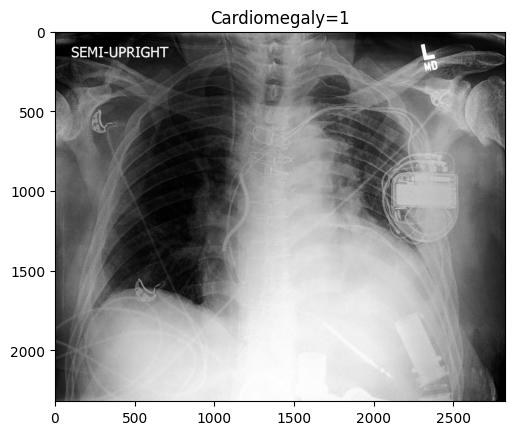

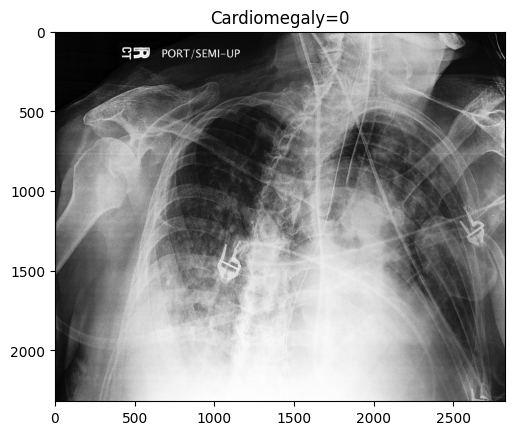

In [12]:
pos_paths = list(train_csv[train_csv.Cardiomegaly==1].Path)
neg_paths = list(train_csv[train_csv.Cardiomegaly==0].Path)

pos_img = Image.open(os.path.join(data_dir, pos_paths[np.random.randint(0,len(pos_paths))])).convert("RGB")
plt.title('Cardiomegaly=1')
plt.imshow(pos_img)
plt.show()
neg_img = Image.open(os.path.join(data_dir, neg_paths[np.random.randint(0,len(neg_paths))])).convert("RGB")
plt.title('Cardiomegaly=0')
plt.imshow(neg_img)
plt.show()

/ext3/miniconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


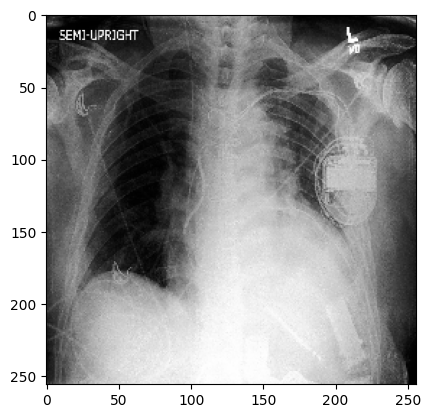

In [13]:
#check resizing operations and shapes
img_arr = np.array(pos_img)
img_arr.shape
img_tensor = torch.from_numpy(img_arr).permute(2,0,1)
resize_tensor = transforms.Resize((256, 256))
img_resized = resize_tensor(img_tensor)
plt.imshow(img_resized.permute(1,2,0))

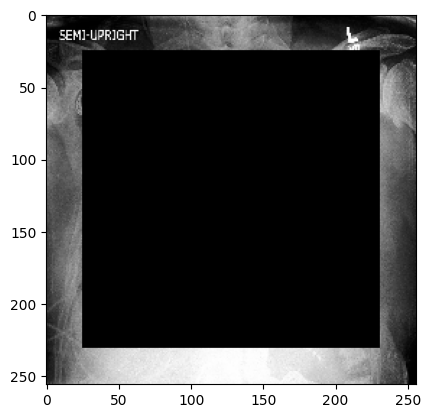

In [14]:
#check cropping 
crop_pix = 25
img_resized[:, crop_pix:-crop_pix, crop_pix:-crop_pix] = 0
plt.imshow(img_resized.permute(1,2,0))

### testing combined dataloaders 

In [7]:
chexpert_dir = '/scratch/paa9751/mlhc-project/resized_data/chexpert'
mimic_dir = '/scratch/paa9751/mlhc-project/resized_data/mimic'
label_type = 'negbio' #this can be negbio or chexpert 
mimic_info = (mimic_dir, label_type)
IMAGE_SIZE = 224                              # Image size (224x224)
BATCH_SIZE = 16                              
LEARNING_RATE = 0.001
MAX_EPOCHS = 100                              # Maximum number of training epochs
NWORKERS=6
BORDER_SZ = 20
TRAIN_SPLIT = 0.7
TRANSFORM=False
K=100
RESIZE=False

In [8]:
train_dataloader, val_dataloader, test_dataloader = load_resized_data(chexpert_dir, mimic_dir, IMAGE_SIZE, TRANSFORM, NWORKERS, BATCH_SIZE, RESIZE, BORDER_SZ)

no resize-mimic
no resize-mimic
no resize-mimic
no resize-chx
no resize-chx
no resize-chx


In [10]:
train_dataloader, val_dataloader, test_dataloader = load_combined_data(chexpert_dir, mimic_info, IMAGE_SIZE, TRANSFORM, NWORKERS, BATCH_SIZE, BORDER_SZ, K)

In [11]:
for i, (batch_x, batch_y, l) in enumerate(test_dataloader): 
    print(batch_x.shape)
    print(l)
    if i==10: 
        break 

torch.Size([16, 1, 256, 256])
tensor([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])
torch.Size([16, 1, 256, 256])
tensor([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])
torch.Size([16, 1, 256, 256])
tensor([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0])
torch.Size([16, 1, 256, 256])
tensor([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1])
torch.Size([16, 1, 256, 256])
tensor([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0])
torch.Size([16, 1, 256, 256])
tensor([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])
torch.Size([16, 1, 256, 256])
tensor([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1])
torch.Size([16, 1, 256, 256])
tensor([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])
torch.Size([16, 1, 256, 256])
tensor([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])
torch.Size([16, 1, 256, 256])
tensor([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1])
torch.Size([16, 1, 256, 256])
tensor([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])


In [33]:
#def load_combined_data(chexpert_dir, mimic_info, IMAGE_SIZE, TRANSFORM, NWORKERS, BATCH_SIZE, TRAIN_SPLIT, BORDER_SZ):
chexpert_df = pd.read_csv(os.path.join(chexpert_dir, 'CheXpert-v1.0/train.csv'))
mimic_df = pd.read_csv(os.path.join(mimic_info[0], f'paths-incl-mimic-cxr-2.0.0-{mimic_info[1]}.csv'))

# ctrain_data, cval_data = train_test_split_stratified(chexpert_df, train_split=TRAIN_SPLIT)
# mtrain_data, mval_data = train_test_split_stratified(mimic_df, train_split=TRAIN_SPLIT)

In [37]:
chexpert_df.Path[0]

'CheXpert-v1.0/train/patient00001/study1/view1_frontal.jpg'

In [35]:
mimic_df.full_path[0]

'mimic-cxr-jpg-2.0.0.physionet.org/files/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg'

In [36]:
 "".join(mimic_df.full_path[0].split('/'))[:-4]

'mimic-cxr-jpg-2.0.0.physionet.orgfilesp10p10000032s5041426702aa804e-bde0afdd-112c0b34-7bc16630-4e384014'

In [23]:
chexpert_df.Path.str.split('/').str[2:4]#.str[:-4]

0         [patient00001, study1]
1         [patient00002, study2]
2         [patient00002, study1]
3         [patient00002, study1]
4         [patient00003, study1]
                   ...          
223409    [patient64537, study2]
223410    [patient64537, study1]
223411    [patient64538, study1]
223412    [patient64539, study1]
223413    [patient64540, study1]
Name: Path, Length: 223414, dtype: object

In [19]:
chexpert_df.sample(frac=0.15).Cardiomegaly.value_counts()

Cardiomegaly
 1.0    4131
 0.0    1594
-1.0    1225
Name: count, dtype: int64

### *fixing resized image paths*

In [60]:
mimic_full=pd.read_csv('resized_data/mimic/full_data_mimic.csv')
mimic_full['new_path'] = os.listdir('resized_data/mimic/imgs')
mimic_full['new_path'] = ('/scratch/paa9751/mlhc-project/resized_data/mimic/imgs/' + mimic_full['new_path']).tolist()
mimic_full.iloc[:, 2:].to_csv('resized_data/mimic/full_data_mimic.csv', index=False)

In [62]:
chex_full=pd.read_csv('resized_data/chexpert/full_data_chexpert.csv')
chex_full['new_path'] = os.listdir('resized_data/chexpert/imgs')
chex_full['new_path'] = ('/scratch/paa9751/mlhc-project/resized_data/chexpert/imgs/' + chex_full['new_path']).tolist()
chex_full[['Path','Sex','Age','Frontal/Lateral', 'Cardiomegaly','subject_id', 'split', 'new_path' ]].to_csv('resized_data/chexpert/full_data_chexpert.csv', index=False)

In [8]:
m = pd.read_csv('resized_data/mimic/full_data_mimic.csv')
c = pd.read_csv('resized_data/chexpert/full_data_chexpert.csv')

In [14]:
test_mimic=m.new_path[45]
test_chx=c.new_path[90]
border_size = 25
mtest_arr = np.load(test_mimic)
ctest_arr = np.load(test_chx)

In [16]:
mtest_arr[0:-0, 0:-0] = 0

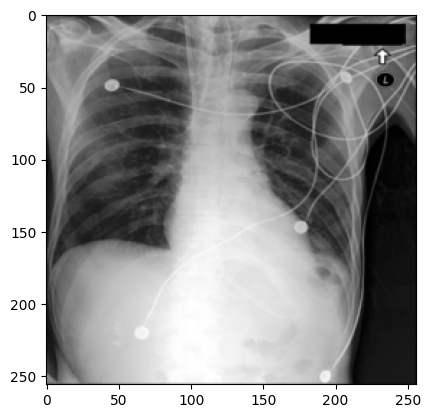

In [17]:
plt.imshow(mtest_arr, cmap='grey')


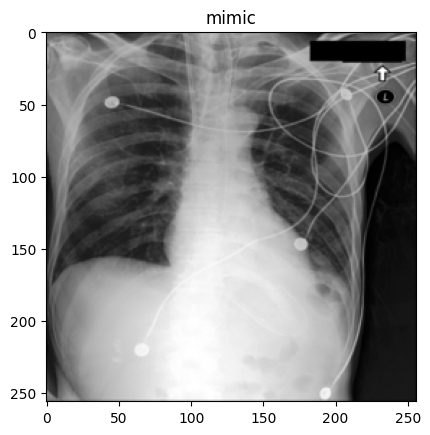

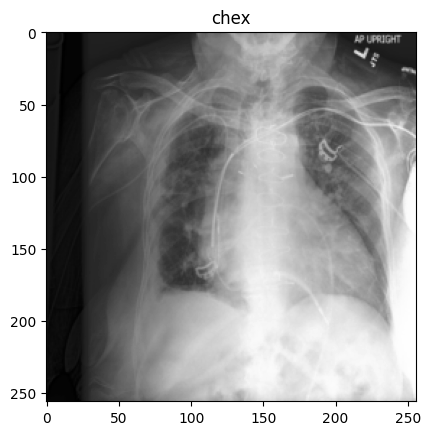

In [55]:
plt.title("mimic")
plt.imshow(mtest_arr, cmap='grey')
plt.show()
plt.title("chex")
plt.imshow(ctest_arr, cmap='grey')

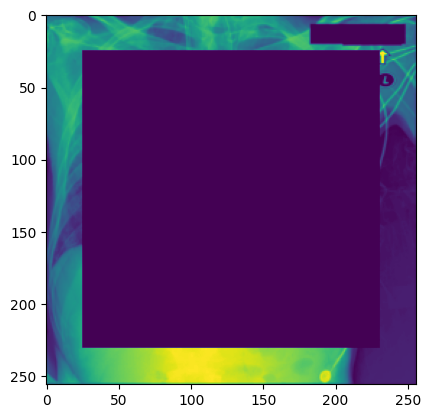

In [49]:
test_arr[border_size:-border_size,border_size:-border_size] = 0
plt.imshow(test_arr)

(array([ 25.,  34.,  12.,  11.,  11.,   3.,   6.,  17.,  13., 124.]),
 array([  0. ,  24.2,  48.4,  72.6,  96.8, 121. , 145.2, 169.4, 193.6,
        217.8, 242. ]),
 <BarContainer object of 10 artists>)

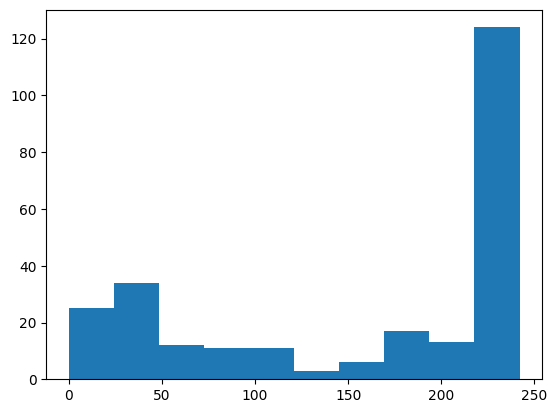

In [90]:
plt.hist(test_arr[0])

In [94]:
tt = transforms.ToTensor()
tensor_ = tt(test_arr)

In [97]:
tensor_

tensor([[[0.0000, 0.0000, 0.0235,  ..., 0.0510, 0.0510, 0.0549],
         [0.0000, 0.0000, 0.0235,  ..., 0.0549, 0.0549, 0.0549],
         [0.0000, 0.0000, 0.0235,  ..., 0.0549, 0.0549, 0.0549],
         ...,
         [0.0000, 0.0000, 0.0235,  ..., 0.0627, 0.0627, 0.0627],
         [0.0000, 0.0000, 0.0275,  ..., 0.0627, 0.0627, 0.0588],
         [0.0000, 0.0000, 0.0196,  ..., 0.0549, 0.0510, 0.0510]]])

1. make a dataloader for chexpert and mimic mixed that has x = border, y = label for cardiomegaly 
2. train a classifier on this and get output probabilities, plot the validation or hold-out output probabilities 
3. train a classifier using group dro on the entire image for both hospitals 

In [3]:
train_loss = np.load('out/90250.000516_training_losses.npy')
val_acc = np.load('out/90250.000516_validation_accuracy.npy')
val_loss = np.load('out/90250.000516_validation_losses.npy')

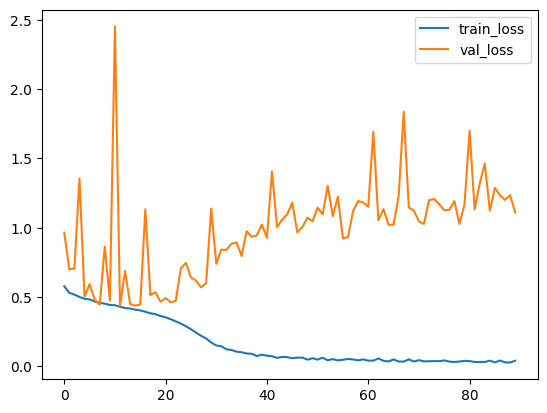

In [4]:
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.legend()

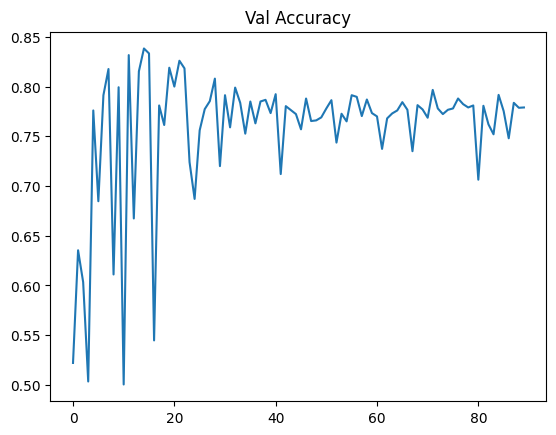

In [6]:
plt.title('Val Accuracy')
plt.plot(val_acc, label='val_acc')
